### ML project

In this project we will explore a dataset with the following columns:
- **RowNumber**—corresponds to the record number.
- **CustomerId**—contains the identification number of the client.
- **Surname**—the surname of the customer.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to 
leave the bank.
- **Geography**—the customer’s location.
- **Gender**—the customer's gender.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.
- **Complain**—customer has complaint or not.
- **Satisfaction Score**—Score provided by the customer for their complaint resolution.
- **Card Type**—type of card hold by the customer.
- **Points Earned**—the points earned by the customer for using credit card.


The idea for this project is a pedagogical one: try to explore as many techniques as you can. I understand you have jobs and families and things to do, so I will focus more on the rigor rather than the quantity. 

## Minimum requirements:

1. Explore the data statistics as you have learned in our and previous modules.
2. Validation techniques: train/validation/test split is the minimum and most common one, but feel free to explore others.
3. Choose a classification model and train it.
4. Check the metrics.


## Optional things to learn more (ask me if you had any questions):

1. Outlier detection
2. Feature selection and dimensionality reduction techniques
3. Imbalanced dataset techniques
4. Hyperparameter tunning
5. Statistical tests

### NOTE: it is important to comment with text *every step* to show that you understand what you are doing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegressionCV

In [3]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Gender
Male      5457
Female    4543
Name: count, dtype: int64
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


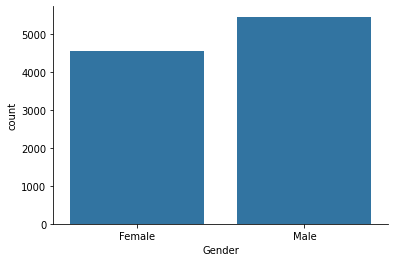

In [7]:
sns.countplot(x=df['Gender'])
sns.despine()

print(df['Gender'].value_counts())
print(df['Gender'].value_counts(normalize=True)*100)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


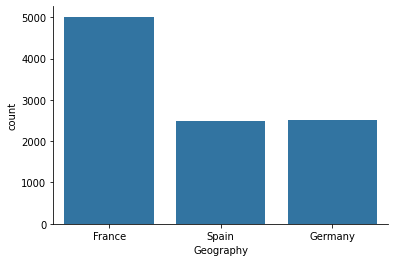

In [8]:
sns.countplot(x=df['Geography'])
sns.despine()

print(df['Geography'].value_counts())
print(df['Geography'].value_counts(normalize=True)*100)

In [9]:
print(df["Exited"].value_counts(normalize=True))

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


In [10]:
df = df.drop(columns=["RowNumber", "CustomerId", 'Surname'])

In [11]:
categorical = ["Geography", "Gender", "Card Type"]

In [12]:
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
             'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']

In [13]:
# Define preprocessing steps for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])

# Split data into features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit and transform the preprocessing on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform validation and test data using fitted preprocessing
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

In [14]:
# Define a classifier (example: Logistic Regression)
classifier = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on preprocessed training data
classifier.fit(X_train_preprocessed, y_train)

# Predictions on validation set
y_val_pred = classifier.predict(X_val_preprocessed)

# Evaluate the model performance on validation set
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))

# Predictions on test set
y_test_pred = classifier.predict(X_test_preprocessed)

# Evaluate the model performance on test set
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))

Validation Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1586
           1       1.00      0.99      0.99       414

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1584    2]
 [   3  411]]
Accuracy Score: 0.9975

Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1606    1]
 [   1  392]]
Accuracy Score: 0.999


In [20]:
# Define the classifier (e.g., Logistic Regression)
classifier = LogisticRegression(max_iter=1000, random_state=42)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(classifier, X_train_preprocessed, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit the model on the training data
classifier.fit(X_train_preprocessed, y_train)

# Predict probabilities on validation set for ROC-AUC
y_val_probs = classifier.predict_proba(X_val_preprocessed)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_probs)
print("\nValidation Set ROC-AUC Score:", roc_auc)

# Predictions on test set
y_test_pred = classifier.predict(X_test_preprocessed)

# Evaluate the model performance on test set
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))

Cross-Validation Scores: [0.99833333 0.99916667 0.99916667 0.99833333 0.99916667]
Mean CV Accuracy: 0.9988333333333334

Validation Set ROC-AUC Score: 0.9971443975364147

Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1606    1]
 [   1  392]]
Accuracy Score: 0.999


In [28]:
from sklearn.preprocessing import OneHotEncoder

# Assuming `encoder` is your OneHotEncoder instance
encoder = OneHotEncoder(drop='first')
X_train_encoded = encoder.fit_transform(X_train[categorical])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names(categorical)

# Combine with numerical feature names
feature_names = list(numerical) + list(encoded_feature_names)

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': classifier.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False).reset_index(drop=True)

# Display top features by absolute coefficient magnitude
print("Top 10 Features by Coefficient Magnitude:")
print(coef_df.head(10))

Top 10 Features by Coefficient Magnitude:
             Feature  Coefficient
0           Complain     5.366599
1                Age     0.745344
2        Gender_Male    -0.601036
3     Card Type_GOLD    -0.587681
4     IsActiveMember    -0.379563
5    Geography_Spain     0.377831
6       Point Earned    -0.371285
7            Balance    -0.350334
8  Geography_Germany    -0.292521
9          HasCrCard    -0.257268


Os dados obtidos indicam que teoricamente o meu modelo tem uma performance extremamente alta, dados os elevados valores obtidos em termos de accuracy score nos "validation" and "test" sets. Contudo, estes valores também podem indicar que posso ter problemas com o meu modelo, nomeadamente "Data Leakage", o dataset pode ter inconsistências ou por exemplo a variable target (exited) pode não ser balanceada (o que a meu ver neste caso acontece 0 - 79.3; 1 - 20.7)

Avaliando outras métricas como "precision", "recall" ou "F1-score", vemos que os valores de performance são também muito elevados. Também quando avaliei métricas a "mean cross-validation accuracy" e "Validation Set Roc-Auc Score", vemos que o modelo é altamente preciso e tem grande capacidade para distinguir entre classes.

Por fim, olhando para o "Coefficient Magnitude" do modelo vemos que a variável "Complain" se destaca claramente como a variável que mais influencia a probabilidade estimada, pelo que o aumento desta variável faz aumentar a probabilidade de se verificar a classe 1 (o que faz sentido neste caso).